In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('data/marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df = df.dropna()
print('Number of data after remove the rows with missing values: ', len(df))

Number of data after remove the rows with missing values:  2216


In [7]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
dates = []
for i in df['Dt_Customer']:
    i = i.date()
    dates.append(i)

print("The newest customer's enrolment date in the records: ", max(dates))
print("The oldest customer's enrolment date in the records: ", min(dates))

The newest customer's enrolment date in the records:  2014-06-29
The oldest customer's enrolment date in the records:  2012-07-30


In [8]:
days = []
d_max = max(dates)
for i in dates:
    delta = d_max - i
    days.append(delta)
    
df['Long_Membership'] = days
df['Long_Membership'] = pd.to_numeric(df['Long_Membership'], errors="coerce")
df[['Dt_Customer', 'Long_Membership']]

,Dt_Customer,Long_Membership
0,2012-09-04,57283200000000000
1,2014-03-08,9763200000000000
2,2013-08-21,26956800000000000
3,2014-02-10,12009600000000000
4,2014-01-19,13910400000000000
...,...,...
2235,2013-06-13,32918400000000000
2236,2014-06-10,1641600000000000
2237,2014-01-25,13392000000000000
2238,2014-01-24,13478400000000000


In [9]:
df['Age'] = 2014 - df['Year_Birth']
df['Spend'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Status'] = df['Marital_Status'].replace({'Married':'Relationship', 'Together':'Relationship', 'Absurd':'Single', 'Widow':'Single', 'YOLO':'Single', 'Divorced':'Single', 'Single':'Single', 'Alone':'Single'})
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Long_Membership,Age,Spend,Status
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,57283200000000000,57,1617,Single
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,9763200000000000,60,27,Single
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,26956800000000000,49,776,Relationship
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,12009600000000000,30,53,Relationship
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,13910400000000000,33,422,Relationship


In [10]:
df = df[df['Income'] < 600000]
df = df[df['Age'] < 80]
drop_attributes = ['ID', 'Year_Birth', 'Marital_Status', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
df.drop(columns=drop_attributes, inplace=True)
df.head()

,Education,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Long_Membership,Age,Spend,Status
0,Graduation,58138.0,635,88,546,172,88,88,3,8,10,4,7,57283200000000000,57,1617,Single
1,Graduation,46344.0,11,1,6,2,1,6,2,1,1,2,5,9763200000000000,60,27,Single
2,Graduation,71613.0,426,49,127,111,21,42,1,8,2,10,4,26956800000000000,49,776,Relationship
3,Graduation,26646.0,11,4,20,10,3,5,2,2,0,4,6,12009600000000000,30,53,Relationship
4,PhD,58293.0,173,43,118,46,27,15,5,5,3,6,5,13910400000000000,33,422,Relationship


In [12]:
map_status = {'Single': 0, 'Relationship': 1}
df.Status.replace(map_status, inplace=True)

map_education = {'Basic': 0, '2n Cycle': 1, 'Graduation': 3, 'Master': 4, 'PhD': 5}
df.Education.replace(map_education, inplace=True)
df.head()

,Education,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Long_Membership,Age,Spend,Status
0,3,58138.0,635,88,546,172,88,88,3,8,10,4,7,57283200000000000,57,1617,0
1,3,46344.0,11,1,6,2,1,6,2,1,1,2,5,9763200000000000,60,27,0
2,3,71613.0,426,49,127,111,21,42,1,8,2,10,4,26956800000000000,49,776,1
3,3,26646.0,11,4,20,10,3,5,2,2,0,4,6,12009600000000000,30,53,1
4,5,58293.0,173,43,118,46,27,15,5,5,3,6,5,13910400000000000,33,422,1


In [13]:
drop_attributes = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
df.drop(columns=drop_attributes, inplace=True)
df.head()

,Education,Income,Long_Membership,Age,Spend,Status
0,3,58138.0,57283200000000000,57,1617,0
1,3,46344.0,9763200000000000,60,27,0
2,3,71613.0,26956800000000000,49,776,1
3,3,26646.0,12009600000000000,30,53,1
4,5,58293.0,13910400000000000,33,422,1


## Model

In [17]:
from sklearn.preprocessing import StandardScaler

df.shape

(2212, 6)

In [18]:
X = df.values[:, :]
X = np.nan_to_num(X)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.28401434,  0.28710487,  1.5277208 ,  1.01835202,  1.67624537,
        -1.34960312],
       [-0.28401434, -0.26088203, -1.18901134,  1.27478522, -0.96329696,
        -1.34960312],
       [-0.28401434,  0.9131964 , -0.20604826,  0.33453017,  0.28011009,
         0.74095857],
       ...,
       [-0.28401434,  0.23334696, -0.98155179, -1.03311355,  1.05205171,
        -1.34960312],
       [ 0.53507264,  0.80317156, -0.97661228,  1.10382975,  0.39133608,
         0.74095857],
       [ 1.35415962,  0.04229031,  1.32520077,  1.27478522, -0.72258398,
         0.74095857]])

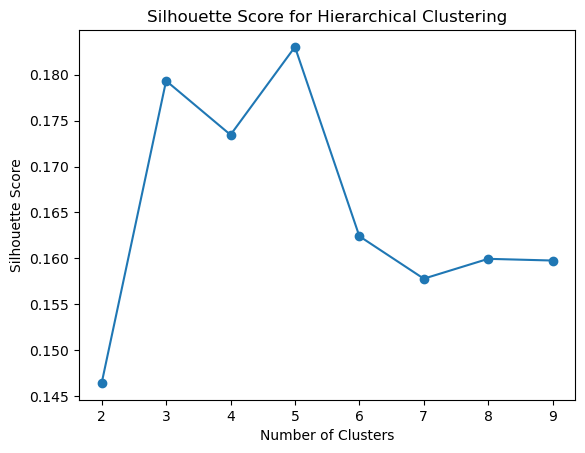

In [19]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

silhouette_scores = []
for n_clusters in range(2, 10):
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    labels = hierarchical.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Score for Hierarchical Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [20]:
clusterNum = 5
hierarchical = AgglomerativeClustering(n_clusters=clusterNum)

labels = hierarchical.fit_predict(X)
df["cluster"] = labels

print(df)

      Education   Income    Long_Membership  Age  Spend  Status  cluster
0             3  58138.0  57283200000000000   57   1617       0        3
1             3  46344.0   9763200000000000   60     27       0        1
2             3  71613.0  26956800000000000   49    776       1        2
3             3  26646.0  12009600000000000   30     53       1        0
4             5  58293.0  13910400000000000   33    422       1        0
...         ...      ...                ...  ...    ...     ...      ...
2235          3  61223.0  32918400000000000   47   1341       1        2
2236          5  64014.0   1641600000000000   68    444       1        2
2237          3  56981.0  13392000000000000   33   1241       0        3
2238          4  69245.0  13478400000000000   58    843       1        2
2239          5  52869.0  53740800000000000   60    172       1        2

[2212 rows x 7 columns]


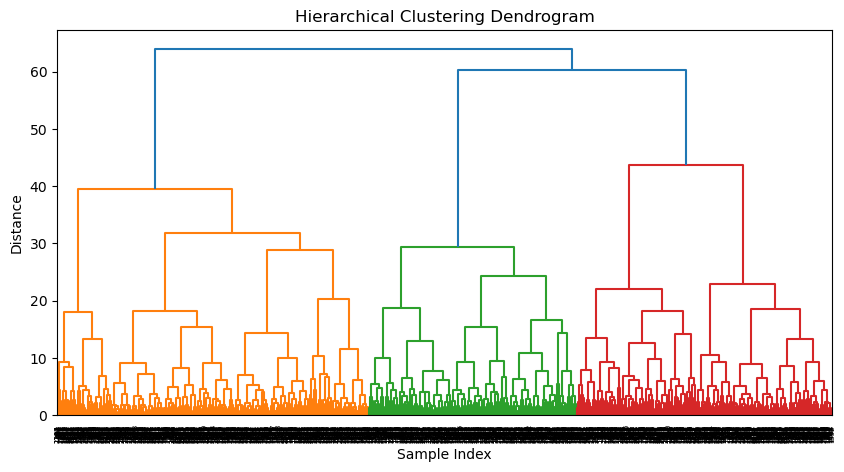

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()